# Machine Learning Practical: Coursework 1

**Release date: Monday 10th October 2016**  
**Due date: 16:00 Thursday 27th October 2016**

Instructions for the coursework are [available as a PDF here](http://www.inf.ed.ac.uk/teaching/courses/mlp/2016/coursework_1.pdf).

## Part 1: Learning rate schedules

In [1]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider
from mlp.initialisers import UniformInit
# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [2]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.schedulers import ConstantLearningRateScheduler, TimeDependentLearningRateScheduler
from mlp.optimisers  import Optimiser
from mlp.learning_rules import GradientDescentLearningRule
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)



error = CrossEntropySoftmaxError()

In [3]:
def train_model_constant(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

    c_schedulers = [ConstantLearningRateScheduler(learning_rate)]
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    global stats1, keys1
    
    c_optimiser = Optimiser(model, error, learning_rule, train_data,valid_data, data_monitors, c_schedulers)
    stats1, keys1, run_time = c_optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    
    return stats1, keys1, run_time

def plt_stats_constant(stats1, keys1):

    # Plot the change in the validation and training set error over training.    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    plt.title('err with constant learning_rate=0.05')
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    plt.title('acc with constant learning_rate=0.05')
    fig_1.tight_layout()
    fig_2.tight_layout()
    fig_1.savefig('const_0.1_error.pdf')
    fig_2.savefig('const_0.1_acc.pdf')
    return fig_1, ax_1, fig_2, ax_2

Constant learning_rate=0.05

In [4]:
num_epochs=100
stats_interval=5
batch_size = 50  # number of data points in a batch
init_scale = 0.01
learning_rate=0.05
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
param_init = UniformInit(-init_scale, init_scale, rng=rng)


model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_constant(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 1.38s to complete
    error(train)=3.35e-01, acc(train)=9.06e-01, error(valid)=3.12e-01, acc(valid)=9.11e-01
Epoch 10: 1.17s to complete
    error(train)=2.50e-01, acc(train)=9.27e-01, error(valid)=2.37e-01, acc(valid)=9.31e-01
Epoch 15: 1.15s to complete
    error(train)=2.03e-01, acc(train)=9.41e-01, error(valid)=1.95e-01, acc(valid)=9.45e-01
Epoch 20: 1.14s to complete
    error(train)=1.69e-01, acc(train)=9.51e-01, error(valid)=1.67e-01, acc(valid)=9.54e-01
Epoch 25: 1.15s to complete
    error(train)=1.44e-01, acc(train)=9.58e-01, error(valid)=1.48e-01, acc(valid)=9.60e-01
Epoch 30: 1.14s to complete
    error(train)=1.24e-01, acc(train)=9.64e-01, error(valid)=1.34e-01, acc(valid)=9.62e-01
Epoch 35: 2.47s to complete
    error(train)=1.09e-01, acc(train)=9.69e-01, error(valid)=1.24e-01, acc(valid)=9.66e-01
Epoch 40: 1.13s to complete
    error(train)=9.52e-02, acc(train)=9.73e-01, error(valid)=1.15e-01, acc(valid)=9.67e-01
Epoch 45: 1.13s to complete
    error(train)=8.36

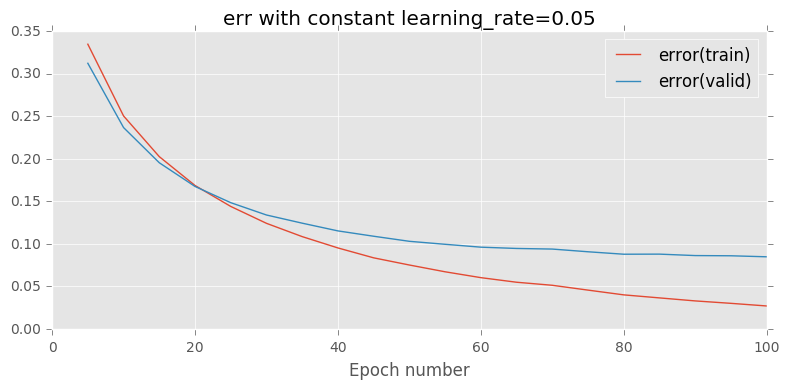

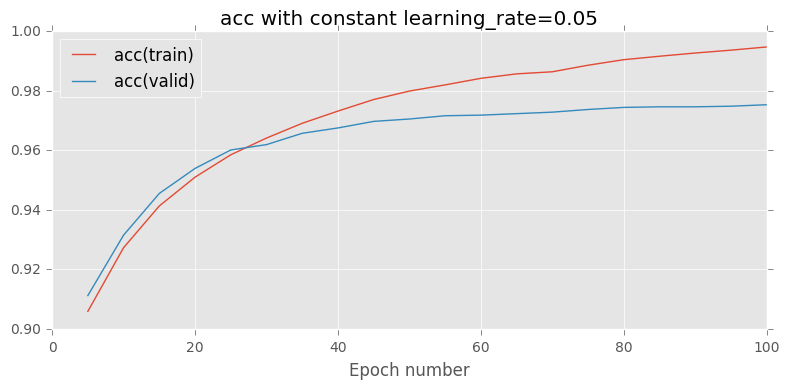

In [5]:
_= plt_stats_constant(stats1,keys1)

In [9]:
## my time-dependentlearningratescheduler##

############################################################################################################


def train_model_fortime(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    t_schedulers=[TimeDependentLearningRateScheduler(learning_rate_time,decay)]

    t_optimiser=Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors, t_schedulers)
    
    global stats2, keys2
    
    stats2, keys2, run_time = t_optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    
    return stats2, keys2, run_time
    ###start ploting


model_time = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

learning_rule_time = GradientDescentLearningRule(learning_rate=learning_rate_time)
_ = train_model_fortime(
    model_time, error, learning_rule_time, train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 1.09s to complete
    error(train)=3.38e-01, acc(train)=9.04e-01, error(valid)=3.15e-01, acc(valid)=9.12e-01
Epoch 10: 1.11s to complete
    error(train)=2.53e-01, acc(train)=9.26e-01, error(valid)=2.37e-01, acc(valid)=9.31e-01


KeyboardInterrupt: 

In [7]:
def plot_stats_fortime(stats2, keys2):   
    fig_3 = plt.figure(figsize=(8, 4))
    ax_3 = fig_3.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_3.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
                  stats2[1:, keys2[k]], label=k)
    ax_3.legend(loc=0)
    ax_3.set_xlabel('Epoch number')
    plt.title('error with time-dependent learning rate')
    # Plot the change in the validation and training set accuracy over training.
    fig_4 = plt.figure(figsize=(8, 4))
    ax_4 = fig_4.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_4.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
                  stats2[1:, keys2[k]], label=k)
    ax_4.legend(loc=0)
    ax_4.set_xlabel('Epoch number')
    plt.title('acc with time-dependent learning rate')
    return fig_3, ax_3, fig_4, ax_4

In [8]:
_=plot_stats_fortime(stats2,keys2)

NameError: name 'stats2' is not defined

In [ ]:
def plot_stats_error(stats1,keys1,stats2,keys2):
    fig_5 = plt.figure(figsize=(8, 4))
    ax_5 = fig_5.add_subplot(111)
    for k in ['error(train)']:
        ax_5.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label='constant')
        ax_5.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
                  stats2[1:, keys2[k]], label='reciprocal')
    ax_5.legend(loc=0)
    ax_5.set_xlabel('Epoch number')
    plt.title('training error')
    plt.show()
    
    fig_6 = plt.figure(figsize=(8, 4))
    ax_6 = fig_6.add_subplot(111)
    for k in ['error(valid)']:
        
        ax_6.plot(np.arange(1, stats1.shape[0]) * stats_interval, stats1[1:, keys1[k]], label='constant')
        ax_6.plot(np.arange(1, stats2.shape[0]) * stats_interval, stats2[1:, keys2[k]], label='reciprocal')

    ax_6.legend(loc=0)
    ax_6.set_xlabel('Epoch number')
    plt.title('valid error')
    plt.show()
    fig_5.tight_layout()
    fig_6.tight_layout()
    fig_5.savefig('trainingerrorcomparsion.pdf')
    fig_6.savefig('validerrorcomparsion.pdf')
    return fig_5, ax_5, fig_6, ax_6

_=plot_stats_error(stats1,keys1,stats2,keys2)

In [ ]:
def plot_stats_error(stats1,keys1,stats2,keys2):
    fig_5 = plt.figure(figsize=(8, 4))
    ax_5 = fig_5.add_subplot(111)
    for k in ['acc(train)']:
        ax_5.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label='constant')
        ax_5.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
                  stats2[1:, keys2[k]], label='reciprocal')
    ax_5.legend(loc=0)
    ax_5.set_xlabel('Epoch number')
    plt.title('training acc')
    plt.show()
    
    fig_6 = plt.figure(figsize=(8, 4))
    ax_6 = fig_6.add_subplot(111)
    for k in ['acc(valid)']:
        
        ax_6.plot(np.arange(1, stats1.shape[0]) * stats_interval, stats1[1:, keys1[k]], label='constant')
        ax_6.plot(np.arange(1, stats2.shape[0]) * stats_interval, stats2[1:, keys2[k]], label='reciprocal')

    ax_6.legend(loc=0)
    ax_6.set_xlabel('Epoch number')
    plt.title('valid acc')
    plt.show()
    fig_5.tight_layout()
    fig_6.tight_layout()
    fig_5.savefig('trainingacccomparsion.pdf')
    fig_6.savefig('validacccomparsion.pdf')
    return fig_5, ax_5, fig_6, ax_6

_=plot_stats_error(stats1,keys1,stats2,keys2)